In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


# XGBoost model
#-------------------------------------------------------
import xgboost as xgb
from xgboost import XGBClassifier

# LGBM model
#-------------------------------------------------------
import lightgbm
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, recall_score, f1_score, accuracy_score

import warnings
warnings.simplefilter('ignore')

In [2]:
df0 = pd.read_csv('data/MIR_Fruit_purees.csv')

In [3]:
df0

,Wavenumbers,NON-Strawberry,NON-Strawberry.1,NON-Strawberry.2,NON-Strawberry.3,NON-Strawberry.4,NON-Strawberry.5,NON-Strawberry.6,NON-Strawberry.7,NON-Strawberry.8,...,NON-Strawberry.622,NON-Strawberry.623,NON-Strawberry.624,NON-Strawberry.625,NON-Strawberry.626,NON-Strawberry.627,NON-Strawberry.628,NON-Strawberry.629,NON-Strawberry.630,NON-Strawberry.631
0,899.327,0.002806,0.002637,0.002416,0.002345,0.002303,0.002514,0.002105,0.002018,0.002154,...,0.002539,0.002569,0.002723,0.002542,0.002627,0.002631,2.730378e-03,0.002713,0.002697,0.002789
1,903.187,0.002732,0.002638,0.002480,0.002292,0.002342,0.002488,0.002078,0.001999,0.002165,...,0.002507,0.002569,0.002714,0.002539,0.002629,0.002651,2.838751e-03,0.002779,0.002905,0.003040
2,907.047,0.002661,0.002651,0.002511,0.002249,0.002350,0.002477,0.002077,0.001945,0.002191,...,0.002483,0.002541,0.002740,0.002574,0.002619,0.002696,2.999267e-03,0.002877,0.003277,0.003359
3,910.907,0.002657,0.002757,0.002611,0.002303,0.002419,0.002542,0.002154,0.001964,0.002275,...,0.002563,0.002599,0.002861,0.002664,0.002714,0.002809,3.258967e-03,0.003085,0.003711,0.003796
4,914.767,0.002699,0.003000,0.002802,0.002466,0.002561,0.002713,0.002311,0.002083,0.002470,...,0.002764,0.002806,0.003090,0.002829,0.002939,0.003022,3.649444e-03,0.003419,0.004265,0.004394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1787.124,0.000087,-0.000006,0.000062,0.000075,0.000099,0.000054,0.000064,0.000102,0.000081,...,0.000004,0.000008,0.000008,0.000005,0.000012,-0.000001,-7.710620e-07,0.000007,-0.000009,-0.000020
231,1790.984,0.000046,0.000002,0.000031,0.000043,0.000054,0.000031,0.000043,0.000064,0.000055,...,0.000007,0.000018,0.000010,0.000007,0.000012,0.000003,2.049950e-07,0.000007,-0.000005,-0.000006
232,1794.844,0.000011,0.000010,0.000009,0.000021,0.000020,0.000016,0.000027,0.000038,0.000033,...,0.000014,0.000014,0.000015,0.000013,0.000010,0.000007,6.586780e-06,0.000012,-0.000002,-0.000005
233,1798.704,0.000009,0.000005,0.000007,0.000008,0.000012,0.000008,0.000012,0.000015,0.000014,...,0.000011,0.000011,0.000010,0.000010,0.000006,0.000008,5.125220e-06,0.000013,0.000001,-0.000002


In [4]:
df = df0.T

df.columns = df0['Wavenumbers']

df = df.drop('Wavenumbers', axis=0)

df = df.reset_index()
df.index.names=['index']
df.loc[df['index'].str.contains('NON'),'target']=1
df.loc[~df['index'].str.contains('NON'),'target']=0
df = df.drop(['index'], axis=1)

print('Targets:')
print('1.0 is adultarated!')
print('0.0 is pure!')
df.target.value_counts()

Targets:
1.0 is adultarated!
0.0 is pure!


target
1.0    632
0.0    351
Name: count, dtype: int64

In [5]:
df

Wavenumbers,899.327,903.187,907.047,910.907,914.767,918.627,922.487,926.347,930.207,934.067,...,1771.684,1775.544,1779.404,1783.264,1787.124,1790.984,1794.844,1798.704,1802.564,target
index,,,,,,,,,,,,,,,,,,,,,
0,0.002806,0.002732,0.002661,0.002657,0.002699,0.002762,0.002749,0.002686,0.002637,0.002617,...,0.000348,0.000216,1.661050e-04,0.000117,8.704010e-05,4.584810e-05,0.000011,0.000009,0.000009,1.0
1,0.002637,0.002638,0.002651,0.002757,0.003000,0.003313,0.003412,0.003302,0.003162,0.003060,...,0.000013,0.000006,-4.961040e-06,-0.000005,-5.507340e-06,1.840890e-06,0.000010,0.000005,0.000005,1.0
2,0.002416,0.002480,0.002511,0.002611,0.002802,0.003031,0.003235,0.003316,0.003257,0.003136,...,0.000290,0.000185,1.367420e-04,0.000090,6.222180e-05,3.113240e-05,0.000009,0.000007,0.000007,1.0
3,0.002345,0.002292,0.002249,0.002303,0.002466,0.002642,0.002703,0.002671,0.002618,0.002567,...,0.000419,0.000267,1.790760e-04,0.000119,7.520990e-05,4.297120e-05,0.000021,0.000008,0.000008,1.0
4,0.002303,0.002342,0.002350,0.002419,0.002561,0.002737,0.002862,0.002860,0.002811,0.002750,...,0.000468,0.000299,2.123230e-04,0.000140,9.875530e-05,5.373010e-05,0.000020,0.000012,0.000012,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,0.002631,0.002651,0.002696,0.002809,0.003022,0.003262,0.003372,0.003315,0.003181,0.003046,...,0.000038,0.000010,-9.861050e-07,-0.000004,-1.267690e-06,2.972400e-06,0.000007,0.000008,0.000000,1.0
979,0.002730,0.002839,0.002999,0.003259,0.003649,0.004125,0.004538,0.004758,0.004682,0.004419,...,0.000038,0.000018,6.989320e-06,0.000003,-7.710620e-07,2.049950e-07,0.000007,0.000005,0.000000,1.0
980,0.002713,0.002779,0.002877,0.003085,0.003419,0.003837,0.004176,0.004298,0.004191,0.003981,...,0.000084,0.000046,2.805840e-05,0.000011,6.590380e-06,6.814360e-06,0.000012,0.000013,0.000000,1.0


In [9]:
def run_LGBM_model(df):
    X = df.drop(['target'], axis=1)
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=777, test_size=0.3)
    model = LGBMClassifier(verbose=-1) #scale_pos_weight=
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, y_pred))
    print('f1: ', f1_score(y_test, y_pred))
    print('roc_auc: ',roc_auc_score(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

def run_XGB_model(df):
    X = df.drop(['target'], axis=1)
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=777, test_size=0.3)
    model = XGBClassifier(verbosity=None) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, y_pred))
    print('f1: ', f1_score(y_test, y_pred))
    print('roc_auc: ',roc_auc_score(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


accuracy:  0.9627118644067797
recall:  0.968421052631579
f1:  0.9709762532981532
roc_auc:  0.9604010025062656


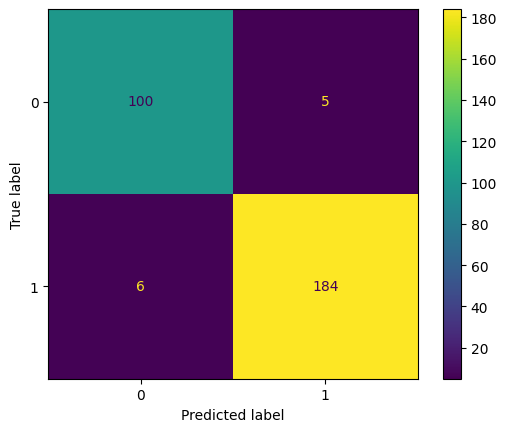

In [7]:
run_LGBM_model(df)

accuracy:  0.9661016949152542
recall:  0.9578947368421052
f1:  0.9732620320855614
roc_auc:  0.969423558897243


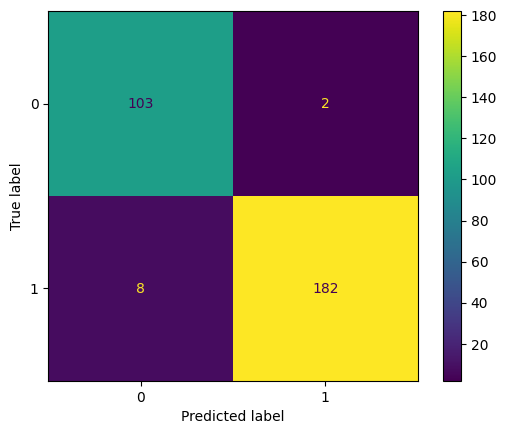

In [10]:
run_XGB_model(df)